In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch 

from IPython import display
display.set_matplotlib_formats('svg')

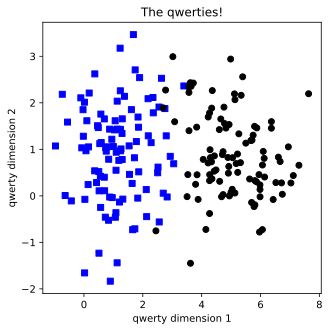

In [2]:
#create data
nPerCluster = 100
blur = 1

A = [1,1]
B = [5,1]

#generate data

a = [A[0]+np.random.randn(nPerCluster)* blur, A[1] + np.random.randn(nPerCluster) * blur]
b = [B[0]+np.random.randn(nPerCluster)* blur, B[1] + np.random.randn(nPerCluster) * blur]


#true labels

labels_np = np.vstack((np.zeros((nPerCluster,1)), np.ones((nPerCluster,1))))


#concatenate into a matirx
data_np = np.hstack((a,b)).T


#convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


#show data
fig = plt.figure(figsize = (5,5))
plt.plot(data[np.where(labels == 0)[0],0],  data[np.where(labels ==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],  data[np.where(labels ==1)[0],1],'ko')

plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
def createANNmodel(learningRate):
  
  #Build the model
  ANNclassify = nn.Sequential(
    nn.Linear(2,1), #input layer
    nn.ReLU(), #activation layer
    nn.Linear(1,1) # output layer
    #nn.sigmoid()
   )
  
  #loss and optimizer function
  lossfun = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)


  return ANNclassify, lossfun, optimizer

  

In [4]:
#Train the modeel
num_epochs = 500

def trainTheModel(ANNmodel):

  losses = torch.zeros(num_epochs)

  for epochi in range(num_epochs):

    #Forward prop
    yhat = ANNmodel(data)

     #loss function 
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  #final forward pass
  predictions = ANNmodel(data)

  #compute the predictions and report accuracy

  totalacc = 100 * torch.mean(((predictions > 0) == labels).float())

  return losses, predictions, totalacc

Testing the function


FINAL ACCURACY : 97% 


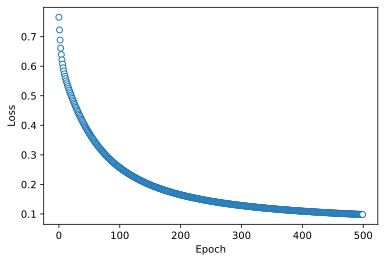

In [5]:
ANNclassify, lossfun, optimizer = createANNmodel(0.1)
losses, predictions, totalacc = trainTheModel(ANNclassify)

print('FINAL ACCURACY : %g%% ' %totalacc)

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

#Experiments

In [6]:
#number of epochs
numepochs = 500
#the range of learning rates for the experiment
learningRate = np.linspace(0.001,0.1,40)

#initialize results output
accByLR = []
allLosses = np.zeros((len(learningRate), numepochs))

#loop through the learning rates

for i, lr in enumerate(learningRate):
  ANNclassify, lossfun, optimizer = createANNmodel(lr)
  losses, predictions, totalacc = trainTheModel(ANNclassify)

  #store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

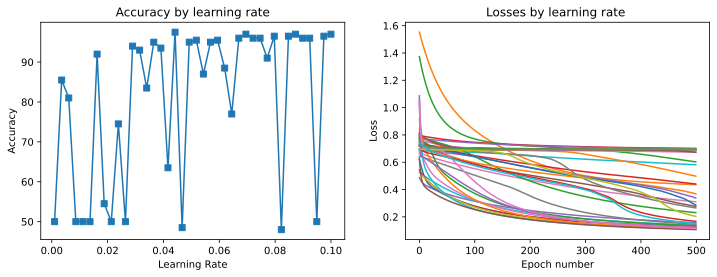

In [7]:
#plot the results
fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(learningRate, accByLR, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate ')
plt.show()

In [8]:
sum(torch.tensor(accByLR) > 70)/len(accByLR)

tensor(0.7250)

Running Meta experiments

In [10]:
numExps = 50

#Matrix to store all results
accMeta = np.zeros((numExps, len(learningRate)))

#fewer epochs to reduce computation time
numepochs = 500

for expi in range(numExps):
  for i, lr in enumerate(learningRate):
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    #store the results
    accMeta[expi, i ] = totalacc


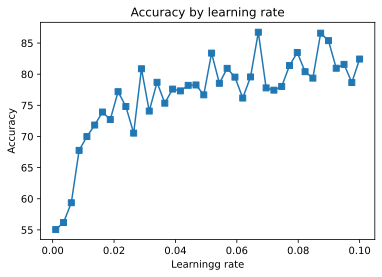

In [11]:
plt.plot(learningRate, np.mean(accMeta, axis =0 ), 's-')
plt.xlabel('Learningg rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()